# Proyecto de Sprint 7. Analisis Exploratorio de datos 

# Tabla de Contenidos
1. [Introducción](#first-bullet)
2. [Importación de librerias](#encabezado-2)
3. [Preprocesamiento de los datos](#encabezado-3)

## Introducción <a class="anchor" id="first-bullet"></a>
En el presente proyecto se presenta un análisis exploratorio de datos para dos tablas distintas, la primera contiene las siguientes columnas o atributos: 
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

La segunda tabla contiene los siguientes atributos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets ahora necesitas se realizó lo siguiente: 
- Se importaron los archivos
- Se estudiaron los datos que contienen
- Se confirmaron que los tipos de datos sean correctos
- Se identificar los 10 principales barrios en términos de finalización del recorrido
- Se realizaron gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Se obtuvieron conclusiones basadas en cada gráfico y explicar los resultados

## Importación de librerias y carga de datasets <a class="anchor" id="encabezado-2"></a>
Al inicio del presente proyecto se importaron las librerias que se utilizaran a lo largo del proyecto y además se cargan los datasets que serán utilizados en el proyecto.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, levene

# Se importan las librerias que se pretenden utilizar

In [13]:
company_trips = pd.read_csv('moved_project_sql_result_01.csv')
average_travel_location = pd.read_csv('moved_project_sql_result_04.csv')
trips_loop_airport = pd.read_csv('moved_project_sql_result_07.csv')

# Se cargan los datasets utilizados a lo largo del proyecto

## Exploración inicial de datos

In [14]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [15]:
average_travel_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [16]:
company_trips.dtypes

company_name    object
trips_amount     int64
dtype: object

In [17]:
average_travel_location.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [18]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [19]:
average_travel_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [20]:
company_trips.duplicated().sum()

0

In [21]:
average_travel_location.duplicated().sum()

0

In [22]:
company_trips.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [23]:
average_travel_location.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [24]:
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [25]:
average_travel_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Después de lo anterior podemos observar los datos se componen de dos tablas diferentes, la primera se compone de 2 atributos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

La segunda tabla contiene los siguientes atributos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
Es preciso mencionar que en esta exploración encontramos que no hay datos nulos y tampoco duplicados. Además tenemos que el tipo de datos es correcto y que los dataset estan listos para utilizarse.

## Analisis de datos 
Se organizan los datos de manera que se logre visualizar su caracteristicas

In [26]:
top_neighborhoods = average_travel_location.sort_values(by= 'average_trips', ascending=False).head(10)
print(top_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [27]:
top_company = company_trips.sort_values(by='trips_amount', ascending=False).head(10)
print(top_company)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


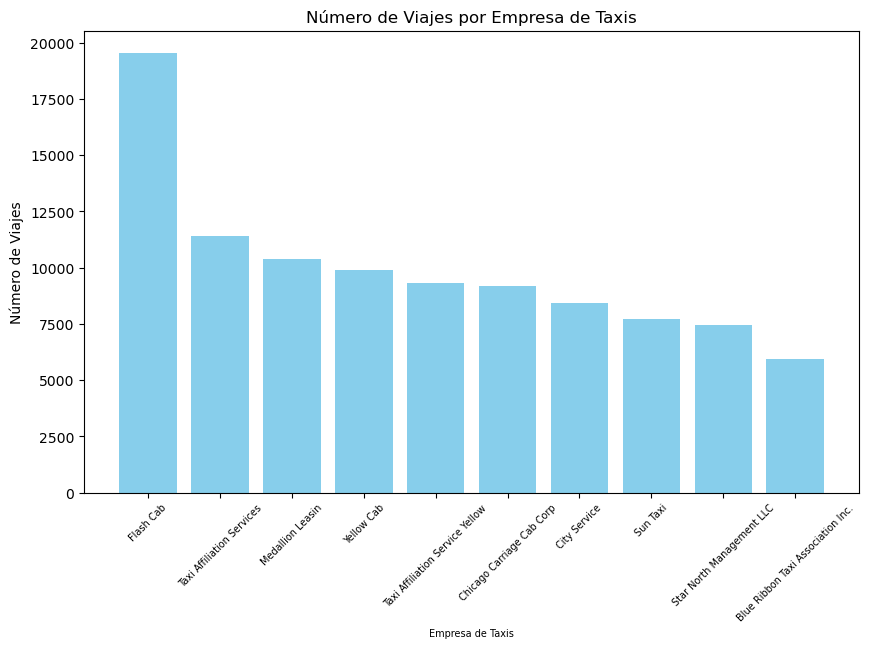

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(top_company['company_name'], top_company['trips_amount'], color='skyblue')
plt.xlabel('Empresa de Taxis',fontsize=7)
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=45, fontsize= 7)
plt.show()
#Se dismuyo el tamaño de letra del gráfico ya que no se alcanzaba a visualizar correctamente

Al analizar el gráfico anterior podemos observar que la empresa con mayor cantidad de viajes es la empresa 'Flash Cab', es preciso mencionar la diferencia con la segunda compañia de taxis ya que tiene un 40% menos de viajes. Además, también se puede deducir que a partir de la 'Taxi Affiliation Services' los cambios no son tan significativos ya que disminuyen pero no de una manera drástica 

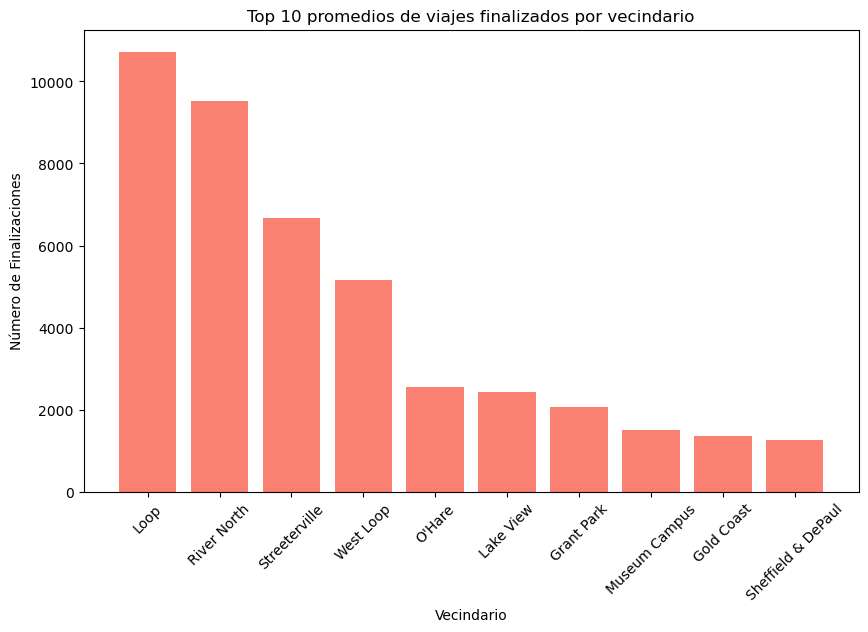

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'], color='salmon')
plt.xlabel('Vecindario')
plt.ylabel('Número de Finalizaciones')
plt.title('Top 10 promedios de viajes finalizados por vecindario')
plt.xticks(rotation=45)
plt.show()

En el grafico anterior nos indica que el vecindario que en promedio tiene más viajes finalizados se encuentra en el vecindario "Loop" y con una diferencia no tan amplia se encuentra el vecindario de "River North". Además, se observa como cambia drásticamente la gráfica a partir de los promedios de finalizaciones de viajes en "O'Hare" que a pesar de ser el quinto vecindario que en promedio tiene más finalizaciones de viajes no supera los un promedio de 3000 viajes. 

## Prueba de hipótesis
A continuación se muestra una tabla que contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 
Los atributos de la tabla son los siguientes:

- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

In [30]:
trips_loop_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [31]:
trips_loop_airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [32]:
trips_loop_airport.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [33]:
trips_correct = trips_loop_airport.drop_duplicates()

In [34]:
trips_correct.duplicated().sum()

0

In [35]:
trips_correct.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Tras revisar la información previa encontramos que el df tenia filas duplicadas por lo que se procedió a eliminarlas, esto debido a que pudiera ser que las condiciones climaticas sean identicas en algunas filas e incluso la duración del viaje. Unicamente podria ser si existieran 2 vuelos que salgan exactamente a la misma hora y que duren exactamente lo mismo, algo que es poco probable

### Planteamiento de las Hipótesis
El problema con la tabla anterior plantea descubrir la siguiente hipótesis: 
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Por lo que se plantearon dos hipótesis
- **Hipótesis Nula (H₀):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos. Es decir, la duración promedio de los viajes en sábados lluviosos es igual a la duración promedio de los viajes en otros días.
- **Hipótesis Alternativa (H₁):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Es decir, la duración promedio de los viajes en sábados lluviosos es diferente de la duración promedio de los viajes en otros días.

In [36]:
statistic, p_value = levene(
    trips_correct.query("weather_conditions == 'Bad'")['duration_seconds'],
    trips_correct.query("weather_conditions == 'Good'")['duration_seconds']
)

p_value
#Usamos la prueba de Levene para determinar que valor utilizamos en la siguiente prueba

0.9806770360671218

In [37]:
statistic, p_value = ttest_ind(
    trips_correct.query("weather_conditions == 'Bad'")['duration_seconds'],
    trips_correct.query("weather_conditions == 'Good'")['duration_seconds'],
    equal_var=True
)

# Establecimiento del umbral alfa
alpha = 0.05

# Resultados
print("Hipótesis: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
print(f"T-Statistic: {statistic}, P-Value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula y concluimos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No rechazaremos la hipótesis nula.")

Hipótesis: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
T-Statistic: 5.427957689754561, P-Value: 7.397770692813658e-08
Rechazamos la hipótesis nula y concluimos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


### Conclusiones de la prueba de hipótesis
Primeramente se realizó una prueba de levene con el objetivo de **Verificar la homogeneidad de varianzas**, lo que realiza esta prueba es lo siguiente: La prueba de Levene evalúa si las varianzas de las duraciones de los viajes en condiciones meteorológicas "Bad" y "Good" son iguales. Si las varianzas son significativamente diferentes, esto puede afectar la validez de otras pruebas estadísticas que asumen varianzas iguales, por ejemplo, la prueba t de Student. El resultado de la prueba de levene fue de aproximadamente 0.9807 lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas.

Esto lo utilizamos en la prueba de t de Student que es una prueba estadística que se utiliza para determinar si hay una diferencia significativa entre las medias de dos grupos. Para esta prueba se coloca el valor de equal_var = True. Esto con la finalidad de rechazar o no la hipotesis nula que se habia planteado en una principio:
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Dando como resultado que: 
- Rechazamos la hipótesis nula y concluimos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

## Conclusiones Generales
Se realizó el analisis exploratorio de datos para las 3 tablas que se presentaron donde se usaron librerias como pandas, scipy.stats, matplot, donde se les aplicaron los metodos de python como info(), describe(), dtypes, duplicated para las 3 tablas. En la tabla de trips_loop_airport se observó que habia filas duplicadas por lo que se uso el método de drop_duplicates para eliminar las filas duplicadas. En las primeras 2 tablas se mostraron las graficas de barras correspondientes que otrorgan los datos sufucientes para analizarlas. Por último se realizaron 2 pruebas estadisticas para la tabla de trips_loop_airport, donde se rechazó la hipótesis nula conluyendo que que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.